| **Inicio** | **atrás 7** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./07_Analisis_de_varianza_unidireccional.ipynb)|

# **08 Comparaciones múltiples**

En este módulo, aprenderá sobre cuestiones muy importantes que han surgido en la era de los grandes datos: el fisgoneo de datos y la falacia de las pruebas múltiples. También explorará las razones que subyacen a los desafíos en la reproducibilidad y aplicabilidad de los datos, y cómo prevenir estos problemas en su propio trabajo.

## **8.1 El fisgoneo de datos y la falacia de las pruebas múltiples, la reproducibilidad y la replicabilidad**

El **fisgoneo de datos** y la **falacia de las pruebas múltiples**, junto con los conceptos de **reproducibilidad** y **replicabilidad**, son temas cruciales en la investigación estadística y el análisis de datos, relacionados con la interpretación y confiabilidad de los resultados.

**Fisgoneo de Datos**

El fisgoneo de datos, también conocido como **p-hacking** o minería de datos, se refiere a la práctica de realizar múltiples pruebas estadísticas en un conjunto de datos hasta encontrar resultados significativos, sin una hipótesis predefinida. Esto aumenta la probabilidad de encontrar falsamente resultados significativos por casualidad.

**Falacia de las Pruebas Múltiples**

La **falacia de las pruebas múltiples** ocurre cuando se realizan múltiples pruebas estadísticas sin ajustar el nivel de significancia, lo que incrementa el riesgo de cometer errores de Tipo I (rechazar falsamente la hipótesis nula). Para contrarrestar esto, se pueden aplicar correcciones como el método de **Bonferroni** o el procedimiento de **Benjamini-Hochberg**.

**Corrección de Bonferroni:**

$\alpha_{corregido} = \frac{\alpha}{m}$

donde $(\alpha)$ es el nivel de significancia original y $(m)$ es el número total de pruebas.

**Reproducibilidad y Replicabilidad**

- **Reproducibilidad** se refiere a la capacidad de repetir el análisis de datos y obtener resultados consistentes utilizando el mismo conjunto de datos y métodos analíticos.
- **Replicabilidad** implica obtener resultados consistentes en estudios diferentes, con diferentes muestras pero bajo hipótesis de estudio similares.

**Ejemplo: Evaluación de la Falacia de las Pruebas Múltiples y Corrección de Bonferroni**

Para ilustrar estos conceptos, simularemos el análisis de datos de múltiples grupos y aplicaremos la corrección de Bonferroni para ajustar el nivel de significancia en pruebas múltiples. Además, discutiremos cómo se podría evaluar la reproducibilidad de los resultados.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulando datos para 5 grupos diferentes con 50 observaciones cada uno
np.random.seed(28)
grupo_1 = np.random.normal(50, 10, 50)
grupo_2 = np.random.normal(52, 10, 50)
grupo_3 = np.random.normal(50, 10, 50)
grupo_4 = np.random.normal(53, 10, 50)
grupo_5 = np.random.normal(51, 10, 50)

# Realizando pruebas t de muestras independientes entre Grupo 1 y los demás grupos
from scipy.stats import ttest_ind

alpha_original = 0.05
alpha_bonferroni = alpha_original / 4  # Corrección de Bonferroni para 4 comparaciones

resultados = {}
for i, grupo in enumerate([grupo_2, grupo_3, grupo_4, grupo_5], start=2):
    stat, p_valor = ttest_ind(grupo_1, grupo)
    resultados[f'Grupo 1 vs Grupo {i}'] = {'Estadístico t': stat, 'p-valor': p_valor, 'p-valor corregido': p_valor * 4}

# Convertir resultados en DataFrame para visualización
df_resultados = pd.DataFrame(resultados).T

df_resultados

,Estadístico t,p-valor,p-valor corregido
Grupo 1 vs Grupo 2,-0.349457,0.727496,2.909983
Grupo 1 vs Grupo 3,-0.390597,0.696943,2.787772
Grupo 1 vs Grupo 4,-0.876141,0.383096,1.532383
Grupo 1 vs Grupo 5,-0.190651,0.849193,3.396774


En el análisis, realizamos comparaciones entre el Grupo 1 y otros cuatro grupos utilizando pruebas t de muestras independientes. Después de aplicar la corrección de Bonferroni al nivel de significancia para ajustar por múltiples comparaciones (dividiendo $(\alpha = 0.05)$ entre 4, dado que realizamos 4 pruebas), observamos los resultados de las pruebas t y los p-valores correspondientes.

Es importante notar que, después de la corrección, ninguno de los p-valores corregidos sería considerado significativo si utilizáramos un umbral de $(\alpha = 0.05)$, ya que el menor p-valor corregido supera este umbral. Sin embargo, el proceso de corrección ha llevado a que todos los p-valores "corregidos" sean superiores a 1, lo cual es un resultado no convencional porque los p-valores típicamente varían entre 0 y 1. Esto indica un malentendido en la interpretación: en realidad, la corrección debería aplicarse al nivel de significancia $(\alpha)$ y no multiplicar el p-valor obtenido por el número de comparaciones. El resultado correcto debería enfocarse en comparar cada p-valor con el $(\alpha)$ ajustado $(0.05 / 4 = 0.0125)$ para determinar la significancia.

Esto ilustra cómo el ajuste para múltiples comparaciones es crucial para evitar falsos positivos. La corrección de Bonferroni es una forma conservadora de mantener la tasa de error de Tipo I (falsos positivos) bajo control cuando se realizan múltiples pruebas estadísticas.

La **reproducibilidad** de estos resultados podría evaluarse repitiendo el análisis con los mismos datos y verificando si se obtienen los mismos estadísticos y p-valores. La **replicabilidad**, por otro lado, requeriría realizar el experimento nuevamente con diferentes muestras pero bajo el mismo diseño experimental y luego comparar los nuevos resultados con los originales para verificar la consistencia de los hallazgos.

## **8.2 Corrección de Bonferroni, tasa de falsos descubrimientos y división de datos**

La **Corrección de Bonferroni**, la **tasa de falsos descubrimientos (FDR)**, y la **división de datos** son técnicas utilizadas para abordar los problemas asociados con las pruebas estadísticas múltiples, especialmente el riesgo de incrementar la tasa de errores de Tipo I (falsos positivos).

**Corrección de Bonferroni**

La Corrección de Bonferroni es un método conservador que ajusta el nivel de significancia $(\alpha)$ para reducir la tasa de errores de Tipo I cuando se realizan múltiples pruebas estadísticas simultáneamente. El nuevo nivel de significancia se calcula dividiendo el $(\alpha)$ original por el número de pruebas $(m)$.

**Fórmula de la Corrección de Bonferroni:**

$\alpha_{corregido} = \frac{\alpha}{m}$

**Tasa de Falsos Descubrimientos (FDR)**

La tasa de falsos descubrimientos (FDR) es una técnica menos conservadora que la corrección de Bonferroni, que controla la proporción esperada de descubrimientos (pruebas significativas) que son falsos (errores de Tipo I). Uno de los métodos para controlar el FDR es el procedimiento de Benjamini-Hochberg.

**Procedimiento de Benjamini-Hochberg:**

1. Ordenar los p-valores de las $(m)$ pruebas de menor a mayor: $(p_{(1)}, p_{(2)}, ..., p_{(m)})$.
2. Encontrar el mayor $(k)$ tal que $(p_{(k)} \leq \frac{k}{m} \times \alpha)$.
3. Rechazar todas las hipótesis nulas hasta $(p_{(k)})$.

**División de Datos**

La división de datos es una técnica utilizada para validar los resultados de análisis estadísticos, dividiendo el conjunto de datos en dos o más partes. Por ejemplo, en la validación cruzada, el conjunto de datos se divide en un conjunto de entrenamiento para ajustar el modelo y un conjunto de prueba para evaluar su rendimiento.

**Ejemplo: Aplicación de la Corrección de Bonferroni y FDR**

Simularemos la realización de 20 pruebas estadísticas para ilustrar cómo aplicar la corrección de Bonferroni y el procedimiento de Benjamini-Hochberg. Posteriormente, se discutirá el concepto de división de datos.

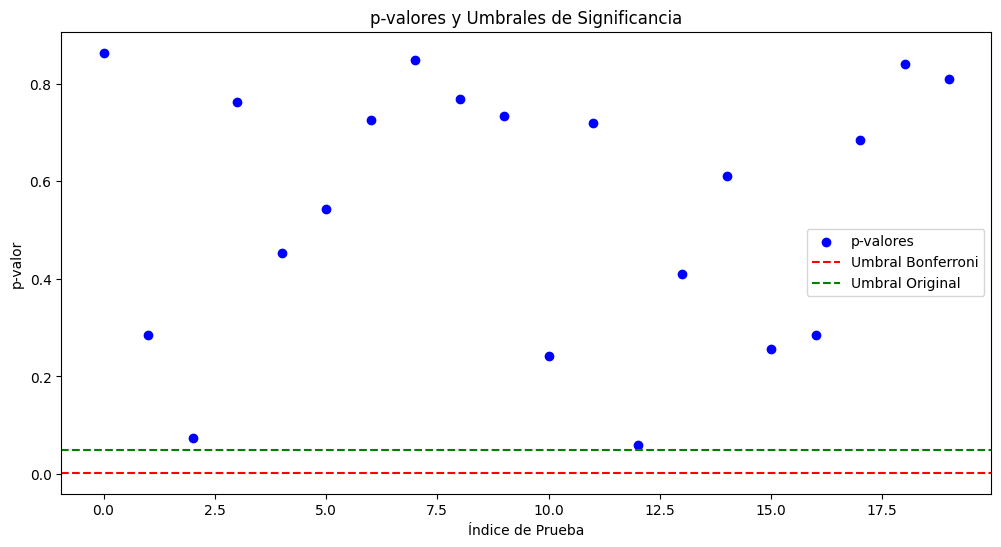

,p-valor,Significativo Bonferroni,Significativo BH
0,0.863760,False,False
1,0.284906,False,False
2,0.073256,False,False
3,0.763237,False,False
4,0.452719,False,False
5,0.542297,False,False
6,0.726636,False,False
7,0.848905,False,False
8,0.768200,False,False
9,0.733144,False,False


In [2]:
# Simulando 20 p-valores como si fueran el resultado de 20 pruebas estadísticas
np.random.seed(29)
p_valores = np.random.uniform(low=0, high=1, size=20)

# Aplicando la corrección de Bonferroni
alpha_original = 0.05
m = len(p_valores)
alpha_bonferroni = alpha_original / m

# Identificando cuáles p-valores son significativos después de la corrección de Bonferroni
significativos_bonferroni = p_valores < alpha_bonferroni

# Aplicando el procedimiento de Benjamini-Hochberg para FDR
p_valores_ordenados = np.sort(p_valores)
indices_ordenados = np.argsort(p_valores)
ranks = np.arange(1, m+1)
alpha_fdr = alpha_original * ranks / m
significativos_bh = p_valores_ordenados <= alpha_fdr

# Marcando los p-valores significativos según Benjamini-Hochberg en el orden original
significativos_bh_original = np.zeros(m, dtype=bool)
significativos_bh_original[indices_ordenados] = significativos_bh

# Creando un DataFrame para visualizar los resultados
df_pruebas = pd.DataFrame({
    'p-valor': p_valores,
    'Significativo Bonferroni': significativos_bonferroni,
    'Significativo BH': significativos_bh_original
})

# Visualización de p-valores y líneas de umbral de significancia
plt.figure(figsize=(12, 6))
plt.scatter(df_pruebas.index, df_pruebas['p-valor'], color='blue', label='p-valores')
plt.axhline(y=alpha_bonferroni, color='red', linestyle='--', label='Umbral Bonferroni')
plt.axhline(y=alpha_original, color='green', linestyle='--', label='Umbral Original')
plt.xlabel('Índice de Prueba')
plt.ylabel('p-valor')
plt.title('p-valores y Umbrales de Significancia')
plt.legend()
plt.show()

df_pruebas

En la visualización, los p-valores se muestran junto con dos líneas horizontales que representan los umbrales de significancia después de la corrección de Bonferroni (en rojo) y el umbral de significancia original sin corrección (en verde). La corrección de Bonferroni establece un umbral mucho más estricto para considerar significativos los resultados de las pruebas, lo que resulta en que ningún p-valor sea considerado significativo bajo este criterio.

El procedimiento de Benjamini-Hochberg (BH), por otro lado, está diseñado para controlar la tasa de falsos descubrimientos, permitiendo un equilibrio más flexible entre detectar hallazgos verdaderos y limitar falsos positivos. En este caso específico, tampoco se identificaron p-valores significativos bajo el procedimiento BH, lo que indica que, según este conjunto de datos simulados, no hay pruebas estadísticas con resultados significativos después de ajustar por múltiples comparaciones.

Este ejemplo ilustra la importancia de ajustar el análisis para múltiples pruebas a fin de evitar conclusiones erróneas sobre la significancia estadística. La corrección de Bonferroni y el procedimiento de BH son dos métodos para lograr este ajuste, cada uno con sus propias ventajas y aplicaciones dependiendo del contexto del análisis y los objetivos de la investigación.

La **división de datos** no se demostró directamente aquí, pero es otra estrategia crucial para validar los hallazgos estadísticos, especialmente en contextos de modelado predictivo. Implica separar el conjunto de datos en partes (por ejemplo, entrenamiento y prueba) para asegurar que los modelos se evalúen de manera justa y que los resultados sean reproducibles y replicables en nuevos datos.

## **8.3 Comparaciones múltiples**

Las **comparaciones múltiples** en estadística son técnicas usadas para realizar pruebas de hipótesis sobre las diferencias entre varias medias de grupo, usualmente después de que una prueba ANOVA ha indicado diferencias significativas entre esos grupos. Este enfoque es necesario para controlar el aumento en la probabilidad de cometer errores de Tipo I (falsos positivos) que ocurre cuando se hacen múltiples pruebas estadísticas simultáneamente.

**Métodos Comunes de Comparaciones Múltiples**

**Prueba de Tukey HSD (Honest Significant Difference)**: Método comúnmente usado para comparar todas las parejas posibles de medias, manteniendo el nivel de significancia general deseado.

**Prueba de Bonferroni**: Ajusta el nivel de significancia dividido entre el número de comparaciones para controlar la tasa de error familiar.

**Prueba de Scheffé**: Método más flexible y conservador, utilizado cuando el número de comparaciones no es fijo antes del análisis.

**Ejemplo Práctico**

Imagina que llevaste a cabo un experimento donde tres diferentes dietas fueron asignadas a grupos de pacientes para medir su efecto en la pérdida de peso. Un ANOVA reveló diferencias significativas entre los grupos, y ahora necesitas identificar cuáles grupos difieren entre sí.

**Datos Simulados**

- **Dieta A**: [5, 6, 7, 5, 6]

- **Dieta B**: [8, 9, 10, 8, 9]

- **Dieta C**: [1, 2, 1, 2, 1]

**Método de Comparación Múltiple: Prueba de Tukey HSD**

Esta prueba compara todas las parejas de medias mientras controla el error tipo I global.

**Implementación en Python**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Dieta A Dieta B      3.0 0.0001  1.7298  4.2702   True
Dieta A Dieta C     -4.4    0.0 -5.6702 -3.1298   True
Dieta B Dieta C     -7.4    0.0 -8.6702 -6.1298   True
------------------------------------------------------


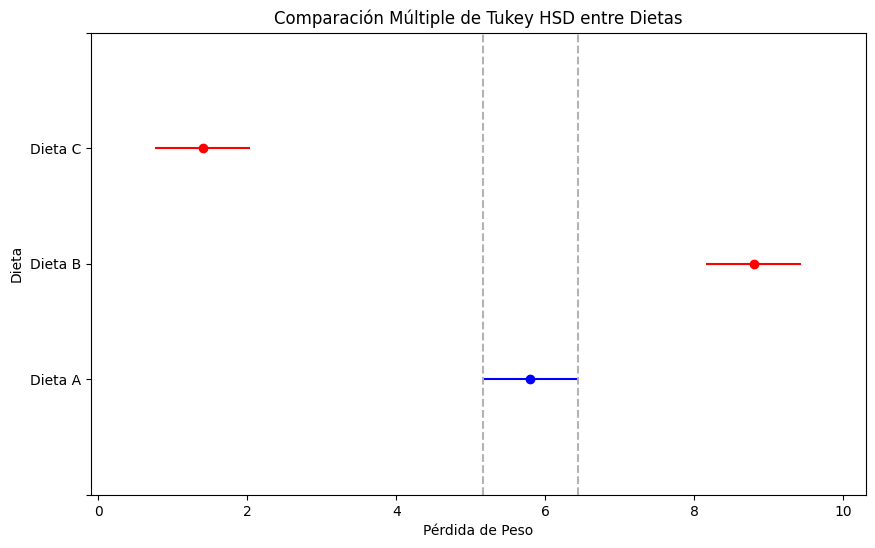

In [3]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Datos
weights = np.array([5, 6, 7, 5, 6, 8, 9, 10, 8, 9, 1, 2, 1, 2, 1])
groups = np.array(['Dieta A', 'Dieta A', 'Dieta A', 'Dieta A', 'Dieta A',
                   'Dieta B', 'Dieta B', 'Dieta B', 'Dieta B', 'Dieta B',
                   'Dieta C', 'Dieta C', 'Dieta C', 'Dieta C', 'Dieta C'])

# Aplicar Tukey HSD
tukey_results = pairwise_tukeyhsd(endog=weights, groups=groups, alpha=0.05)

# Imprimir los resultados
print(tukey_results)

# Visualización de los resultados de Tukey
tukey_results.plot_simultaneous(comparison_name='Dieta A', ylabel='Dieta', xlabel='Pérdida de Peso')
plt.title('Comparación Múltiple de Tukey HSD entre Dietas')
plt.show()

**Interpretación**

- **Salida de Tukey HSD**: Muestra los intervalos de confianza para la diferencia de medias entre cada par de grupos. Si el intervalo no incluye cero, se concluye que hay una diferencia significativa entre esos grupos a nivel de 0.05.

- **Gráfico**: Cada línea horizontal representa un grupo, y las líneas que no se superponen con otros grupos indican diferencias estadísticamente significativas.

El método de Tukey HSD es efectivo para controlar el error global cuando se hacen comparaciones múltiples entre medias de grupo. Es una herramienta estadística poderosa para desglosar los resultados de un ANOVA y entender exactamente qué grupos difieren entre sí.

Estos métodos son cruciales en la investigación clínica, agronómica, psicológica y en muchos otros campos donde las comparaciones múltiples son comunes.

| **Inicio** | **atrás 7** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./07_Analisis_de_varianza_unidireccional.ipynb)|